In [1]:
import pandas as pd
import numpy as np

In [2]:
df_wine = pd.read_csv('wine.data', header=None)

In [3]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [4]:
print('Class Labels:', np.unique(df_wine['Class label']))

Class Labels: [1 2 3]


In [5]:
df_wine.head

<bound method NDFrame.head of      Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0              1    14.23        1.71  2.43               15.6        127   
1              1    13.20        1.78  2.14               11.2        100   
2              1    13.16        2.36  2.67               18.6        101   
3              1    14.37        1.95  2.50               16.8        113   
4              1    13.24        2.59  2.87               21.0        118   
5              1    14.20        1.76  2.45               15.2        112   
6              1    14.39        1.87  2.45               14.6         96   
7              1    14.06        2.15  2.61               17.6        121   
8              1    14.83        1.64  2.17               14.0         97   
9              1    13.86        1.35  2.27               16.0         98   
10             1    14.10        2.16  2.30               18.0        105   
11             1    14.12        1.48  2.32   

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
mms = MinMaxScaler()

In [11]:
X_train_norm = mms.fit_transform(X_train)

In [12]:
X_test_norm = mms.transform(X_test)

In [13]:
ex = np.array([0, 1, 2, 3, 4, 5])

In [14]:
print('Standardized:', (ex - ex.mean()) / ex.std())

Standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


In [15]:
print('Normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

Normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
stdsc = StandardScaler()

In [18]:
X_train_std = stdsc.fit_transform(X_train)

In [19]:
X_test_std = stdsc.transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
feat_labels = df_wine.columns[1:]

In [22]:
forest = RandomForestClassifier(n_estimators=500, random_state=1)

In [23]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [24]:
importances = forest.feature_importances_

In [25]:
indices = np.argsort(importances)[::-1]

In [26]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


In [27]:
import matplotlib.pyplot as plt

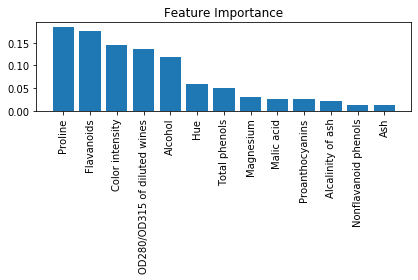

In [28]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [29]:
from sklearn.feature_selection import SelectFromModel

In [30]:
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)

In [31]:
X_selected = sfm.transform(X_train)

In [32]:
print('Number of features that meet this threshold criterion:', X_selected.shape[1])

Number of features that meet this threshold criterion: 5


In [33]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
